1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
tweets = pd.read_csv('Elon_musk.csv',encoding='cp1252')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
tweets.drop(['Unnamed: 0'], inplace= True, axis= 1)
tweets

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
import itertools

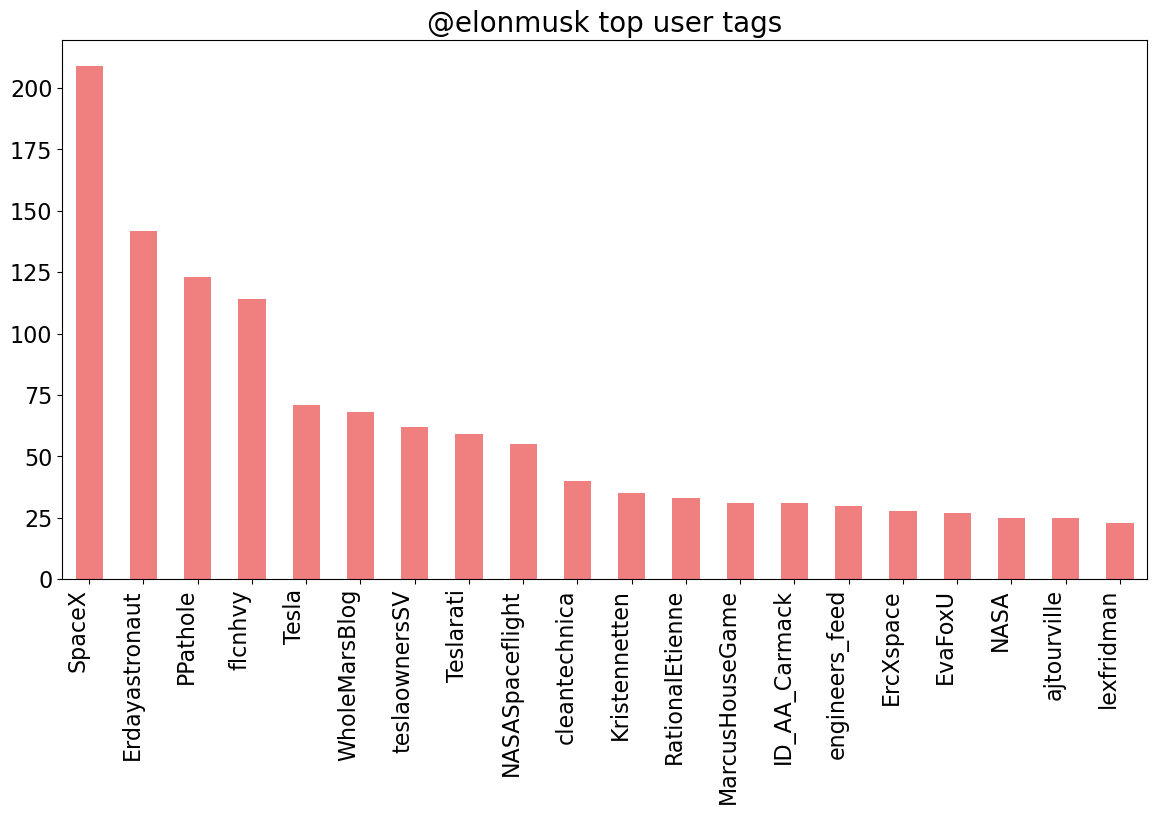

In [8]:
c = list(itertools.chain(*tweets.Text.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ")
                                                     if '@' in handle.replace(":", "")]).tolist()))

pd.Series(c).value_counts().head(20).plot.bar(figsize=(14, 7), fontsize=16, color='lightcoral')
plt.gca().set_title('@elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=16)
pass

In [9]:
import re 
import string

In [10]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)


In [11]:
tweets["Text"] = tweets["Text"].apply(clean_text) # Clean The Text
tweets

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1994,flcnhvy true it sounds so surreal but the nega...
1995,ppathole make sure to read ur terms amp condit...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is


In [12]:
freq = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:20] # for top 20
freq

the               487
to                400
a                 356
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                138
we                136
on                129
that              128
rt                127
but               126
Name: count, dtype: int64

In [13]:
from nltk.corpus import stopwords

In [14]:
stop = stopwords.words('english')
tweets['Text'] = tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [15]:
freq_stp = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:20] # for top 20
freq_stp

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
nasaspaceflight     55
haha                55
good                51
launch              49
sure                43
yeah                41
cleantechnica       40
would               40
Name: count, dtype: int64

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
vectorizer

CountVectorizer(max_df=0.9)

In [18]:
X = vectorizer.fit_transform(tweets["Text"])

In [19]:
X

<1999x4463 sparse matrix of type '<class 'numpy.int64'>'
	with 13077 stored elements in Compressed Sparse Row format>

In [20]:
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

In [21]:
word_freq_df

,term,occurrences,frequency
0,aber,1,0.000076
1,able,6,0.000453
2,abo,1,0.000076
3,aboard,1,0.000076
4,abort,3,0.000227
...,...,...,...
4458,zshauladventure,1,0.000076
4459,zubinanary,1,0.000076
4460,zwiebelbach,1,0.000076
4461,zzcool,1,0.000076


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True)
vectorizer

TfidfVectorizer(max_df=0.5, max_features=1000, stop_words='english')

In [24]:
doc_vec = vectorizer.fit_transform(tweets["Text"])

In [26]:
names_features = vectorizer.get_feature_names_out()
names_features

array(['able', 'abort', 'absolutely', 'access', 'accurate', 'actual',
       'actually', 'adamklotz', 'add', 'adding', 'advanced', 'ago',
       'agree', 'agreed', 'ahead', 'ahem', 'ai', 'aiming', 'air',
       'ajtourville', 'alexavoigt', 'allocation', 'alvianchoiri',
       'amazing', 'amp', 'analysis', 'ancient', 'aoc', 'appears', 'apply',
       'applying', 'appreciate', 'appreciated', 'approach', 'approval',
       'approximately', 'archillect', 'architecture', 'arkinvest', 'arm',
       'arstechnica', 'art', 'article', 'astrobehnken', 'astrodoug',
       'astrojordy', 'astronaut', 'astronauts', 'astronomiaum', 'august',
       'austin', 'austinteslaclub', 'australia', 'automatically',
       'autonomous', 'autopilot', 'autopilotai', 'avalonpenrose',
       'average', 'away', 'awesome', 'background', 'backup', 'bad', 'bar',
       'base', 'based', 'basic', 'battery', 'bay', 'bbcsciencenews',
       'benmezrich', 'berlin', 'berniesanders', 'best', 'beta', 'better',
       'big', 'b

In [40]:
dense = doc_vec.todense()
denselist = dense.tolist()

In [41]:
df = pd.DataFrame(denselist, columns = names_features)
df

,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yeah,year,years,yes,yesterdays,youre,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.356742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [43]:
top2_words = get_top_n2_words(tweets["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
top2_df

,Bi-gram,Freq
0,rt spacex,71
1,spacex falcon,17
2,erdayastronaut spacex,16
3,pretty much,12
4,rt nasa,12
...,...,...
195,would cool,3
196,doesnt seem,3
197,felixschlang spacex,3
198,ppathole tashaark,3


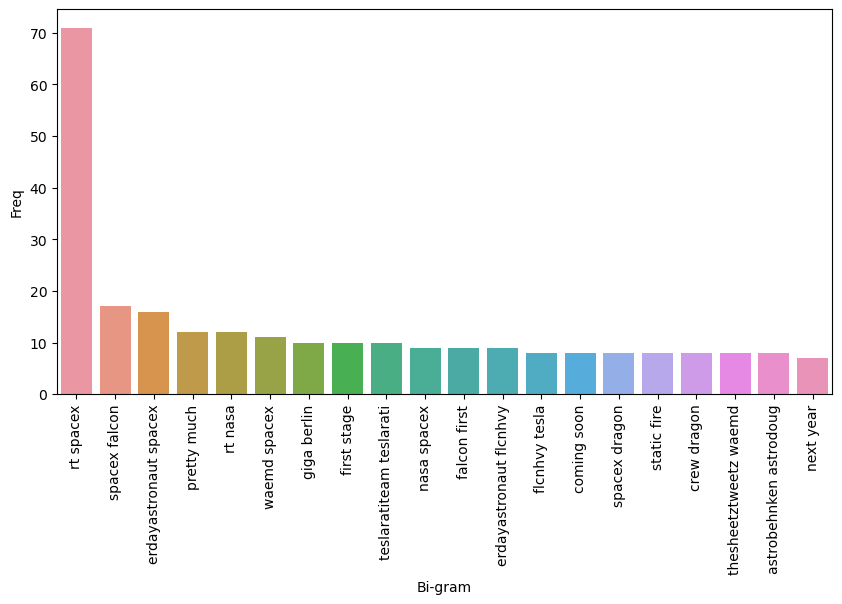

In [44]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

In [45]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [46]:
top3_words = get_top_n3_words(tweets["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
top3_df

,Tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7
...,...,...
195,flaps amp nosecone,2
196,erdayastronaut ppathole spacex,2
197,spceenthusiast tjmurphymit thesheetztweetz,2
198,marcushousegame spacex erdayastronaut,2


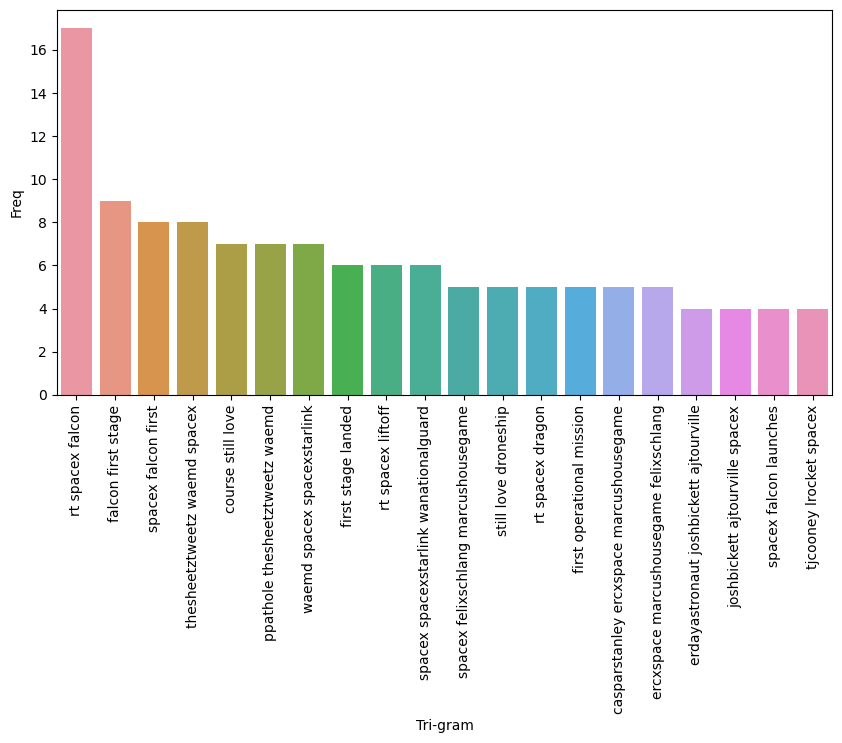

In [47]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

In [48]:
string_Total = " ".join(tweets["Text"])

In [49]:
from wordcloud import WordCloud

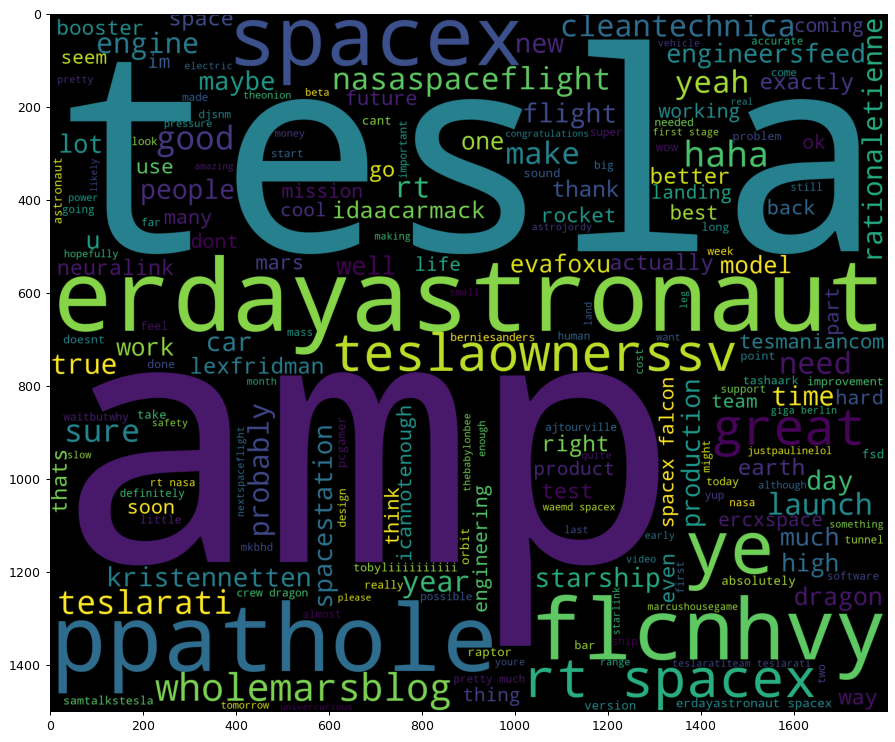

In [50]:
plt.figure(figsize=(12,12),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw);


In [52]:
!pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
     - ----------------------------------- 30.7/636.8 kB 435.7 kB/s eta 0:00:02
     ------ ----------------------------- 112.6/636.8 kB 939.4 kB/s eta 0:00:01
     --------------- ---------------------- 256.0/636.8 kB 1.6 MB/s eta 0:00:01
     --------------------- ---------------- 358.4/636.8 kB 1.7 MB/s eta 0:00:01
     -------------------------- ----------- 450.6/636.8 kB 1.8 MB/s eta 0:00:01
     -------------------------------- ----- 553.0/636.8 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 1.8 MB/s eta 0:00:00


In [53]:
from textblob import TextBlob


In [59]:
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [60]:
tweets[["subjectivity", "polarity"]] = tweets.apply(sentiment_analysis, axis=1)
tweets

,Text,subjectivity,polarity
0,im alien,0.750000,-0.250000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000
2,joerogan spotify great interview,0.750000,0.800000
3,doge underestimated,0.000000,0.000000
4,teslacn congratulations tesla china amazing ex...,0.322222,0.200000
...,...,...,...
1994,flcnhvy true sounds surreal negative propagand...,0.508333,0.111111
1995,ppathole make sure read ur terms amp condition...,0.888889,0.500000
1996,teslagong ppathole samwise gamgee,0.000000,0.000000
1997,ppathole altho dumb dumber,0.500000,-0.375000


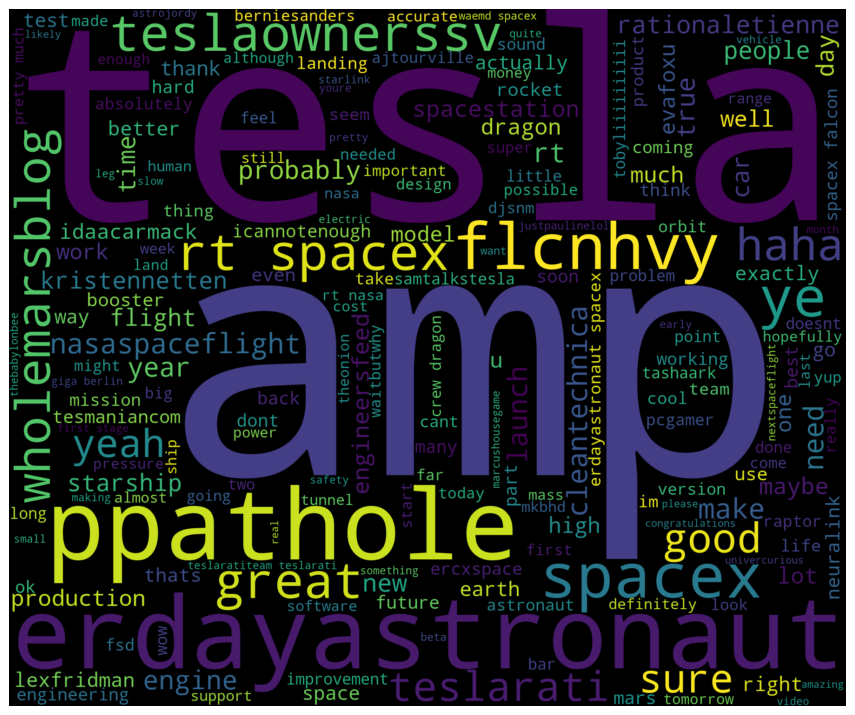

In [61]:
allwords = " ".join([twts for twts in tweets["Text"]])
wordCloud = WordCloud(width = 1800, height = 1500, random_state = 21).generate(allwords)
plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [62]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [63]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
tweets["analysis"] = tweets["polarity"].apply(analysis)

In [64]:
positive_tweets = tweets[tweets['analysis'] == 'Positive']
negative_tweets = tweets[tweets['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
    print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
    print(' -' + row['Text'])

positive tweets
 -joerogan spotify great interview
 -teslacn congratulations tesla china amazing execution last year next even
 -happy new year ox
 -owensparks flcnhvy haha thanks
 -entertaining outcome likely
negative tweets
 -im alien
 -frodo underdoge thought would fail httpstcozgxjfdzzrm
 -freewalletorg app sucks
 -rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor however
 -rationaletienne adamklotz spacex needs pass deep chasm negative cash flow next year
